In [2]:
import pandas as pd #for data processing
import numpy as np #for numerical operations
import seaborn as sns #for statistical visualization
import plotly.express as px #for statistical visualization
import matplotlib.pyplot as plt #for visualization
import scipy.stats as scp #for mathematical stats
from sklearn.model_selection import train_test_split
from catboost import Pool, CatBoostClassifier, cv
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# EDA

In [3]:
eda = pd.read_csv('train.csv')

In [4]:
eda.matchup.value_counts()

TvP    202
TvZ    183
PvZ    162
PvP    142
TvT     74
ZvZ     66
Name: matchup, dtype: int64

In [5]:
eda.columns

Index(['id', 'played_at', 'tournament', 'map', 'game_length', 'winner',
       'matchup', 'p1_max_collection_rate', 'p2_max_collection_rate', 'p1_apm',
       'p2_apm', 'p1_spm', 'p2_spm', 'p1_workers_produced',
       'p2_workers_produced', 'p1_workers_killed', 'p2_workers_killed',
       'p1_workers_lost', 'p2_workers_lost', 'p1_supply_block',
       'p2_supply_block', 'p1_sq', 'p2_sq', 'p1_avg_pac_per_min',
       'p2_avg_pac_per_min', 'p1_avg_pac_action_latency',
       'p2_avg_pac_action_latency', 'p1_avg_pac_actions', 'p2_avg_pac_actions',
       'p1_avg_pac_gap', 'p2_avg_pac_gap', 'p1_avg_collection_rate_minerals',
       'p1_avg_unspent_minerals', 'p1_minerals_lost', 'p1_minerals_collected',
       'p2_avg_collection_rate_minerals', 'p2_avg_unspent_minerals',
       'p2_minerals_lost', 'p2_minerals_collected',
       'p1_avg_collection_rate_gas', 'p1_avg_unspent_gas', 'p1_gas_lost',
       'p1_gas_collected', 'p2_avg_collection_rate_gas', 'p2_avg_unspent_gas',
       'p2_gas_lo

In [6]:
eda

,id,played_at,tournament,map,game_length,winner,matchup,p1_max_collection_rate,p2_max_collection_rate,p1_apm,...,p1_avg_collection_rate_gas,p1_avg_unspent_gas,p1_gas_lost,p1_gas_collected,p2_avg_collection_rate_gas,p2_avg_unspent_gas,p2_gas_lost,p2_gas_collected,p1_race,p2_race
0,0205bd314da54b6fb363a998ca0c49ba,2022-02-25 03:01:50+00:00,IEM Katowice,2000 애트모스피어 - 래더,848,2,TvT,3778,3952,316,...,533.8,273.8,3436,6384,636.3,253.2,2864,7412,Terran,Terran
1,7ca6c874c8064364b4247780495fe4f2,2021-10-17 05:11:18+00:00,DH Masters Winter,Beckett Industries LE,612,1,PvZ,4344,3140,398,...,473.9,236.7,625,4265,427.4,201.3,850,3665,Zerg,Protoss
2,92ccfb1330424a4fb572585b8d6ea4c9,2021-10-10 01:50:23+00:00,DH Masters Winter,Beckett Industries LE,486,2,PvZ,3095,2944,389,...,226.5,157.6,800,1668,336.1,170.0,75,2436,Zerg,Protoss
3,d592c15de2a94b6aa5278b0fc241de54,2022-02-25 04:27:49+00:00,IEM Katowice,[ESL] Berlingrad,1078,2,PvZ,4064,4193,449,...,749.7,401.2,5850,11682,892.6,664.5,3850,13344,Protoss,Zerg
4,6a24b0487aef460a982d2ec930947c11,2021-12-15 19:17:24+00:00,DH Masters Last Chance,블랙번 - 래더,1001,1,PvZ,4484,4243,627,...,826.1,299.8,8975,11930,675.6,174.5,8200,10256,Zerg,Protoss
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,bb13189cdb4c4d34bebc09f2546df46e,2022-01-13 22:58:13+00:00,DH Masters Last Chance,[TLMC15] Pride of Altaris,1059,1,ZvZ,3863,3471,471,...,561.1,243.5,4025,7971,446.9,147.0,4018,6423,Zerg,Zerg
825,3ee7eb14c106467683af88ae1bfda71b,2021-10-02 01:01:18+00:00,DH Masters Winter,Jagannatha LE,473,1,PvP,2754,2625,225,...,298.7,121.2,700,1939,332.4,129.8,600,2432,Protoss,Protoss
826,0065adb438824feb9e1ae15d41454797,2021-09-30 01:21:21+00:00,DH Masters Winter,Oxide LE,650,2,TvP,2860,3510,456,...,413.2,173.2,1900,3867,457.3,195.0,1250,4383,Terran,Protoss
827,e221451188444336a154949b8fe4ac33,2022-02-26 00:08:08+00:00,IEM Katowice,[ESL] Blackburn,881,1,PvZ,4613,3862,558,...,793.9,306.3,4100,10243,580.9,295.9,2925,8144,Zerg,Protoss


In [7]:
#Extract time played
eda['played_at'] = eda['played_at'].apply(lambda x: int(x.split()[1][:2]))

eda.loc[(eda.played_at < 6) & (eda.played_at >=0), 'played_at'] = 0 #pagi
eda.loc[(eda.played_at < 12) & (eda.played_at >=6), 'played_at'] = 1 #siang
eda.loc[(eda.played_at < 18) & (eda.played_at >=12), 'played_at'] = 2 #sore
eda.loc[(eda.played_at < 24) & (eda.played_at >=18), 'played_at'] = 3 #malam

In [8]:
eda.head()

,id,played_at,tournament,map,game_length,winner,matchup,p1_max_collection_rate,p2_max_collection_rate,p1_apm,...,p1_avg_collection_rate_gas,p1_avg_unspent_gas,p1_gas_lost,p1_gas_collected,p2_avg_collection_rate_gas,p2_avg_unspent_gas,p2_gas_lost,p2_gas_collected,p1_race,p2_race
0,0205bd314da54b6fb363a998ca0c49ba,0,IEM Katowice,2000 애트모스피어 - 래더,848,2,TvT,3778,3952,316,...,533.8,273.8,3436,6384,636.3,253.2,2864,7412,Terran,Terran
1,7ca6c874c8064364b4247780495fe4f2,0,DH Masters Winter,Beckett Industries LE,612,1,PvZ,4344,3140,398,...,473.9,236.7,625,4265,427.4,201.3,850,3665,Zerg,Protoss
2,92ccfb1330424a4fb572585b8d6ea4c9,0,DH Masters Winter,Beckett Industries LE,486,2,PvZ,3095,2944,389,...,226.5,157.6,800,1668,336.1,170.0,75,2436,Zerg,Protoss
3,d592c15de2a94b6aa5278b0fc241de54,0,IEM Katowice,[ESL] Berlingrad,1078,2,PvZ,4064,4193,449,...,749.7,401.2,5850,11682,892.6,664.5,3850,13344,Protoss,Zerg
4,6a24b0487aef460a982d2ec930947c11,3,DH Masters Last Chance,블랙번 - 래더,1001,1,PvZ,4484,4243,627,...,826.1,299.8,8975,11930,675.6,174.5,8200,10256,Zerg,Protoss


In [9]:
eda.tail()

,id,played_at,tournament,map,game_length,winner,matchup,p1_max_collection_rate,p2_max_collection_rate,p1_apm,...,p1_avg_collection_rate_gas,p1_avg_unspent_gas,p1_gas_lost,p1_gas_collected,p2_avg_collection_rate_gas,p2_avg_unspent_gas,p2_gas_lost,p2_gas_collected,p1_race,p2_race
824,bb13189cdb4c4d34bebc09f2546df46e,3,DH Masters Last Chance,[TLMC15] Pride of Altaris,1059,1,ZvZ,3863,3471,471,...,561.1,243.5,4025,7971,446.9,147.0,4018,6423,Zerg,Zerg
825,3ee7eb14c106467683af88ae1bfda71b,0,DH Masters Winter,Jagannatha LE,473,1,PvP,2754,2625,225,...,298.7,121.2,700,1939,332.4,129.8,600,2432,Protoss,Protoss
826,0065adb438824feb9e1ae15d41454797,0,DH Masters Winter,Oxide LE,650,2,TvP,2860,3510,456,...,413.2,173.2,1900,3867,457.3,195.0,1250,4383,Terran,Protoss
827,e221451188444336a154949b8fe4ac33,0,IEM Katowice,[ESL] Blackburn,881,1,PvZ,4613,3862,558,...,793.9,306.3,4100,10243,580.9,295.9,2925,8144,Zerg,Protoss
828,420ff58dc75e4647b2d4d268f04278a3,0,DH Masters Winter,Jagannatha LE,447,2,PvP,2014,2311,219,...,195.3,89.8,450,1252,269.3,128.7,225,1692,Protoss,Protoss


As we can see from the dataset above, sometime `matchup` column does not represented well in `p1_race` and `p2_race` ex: TvP -> p1_race: `Protoss` , p2_race: `Terran`. Now i will switch p1_ and p2_ value to make it representative with the matchup

I also noticed that the map is stored in different language, so i will translate them to english

In [10]:
eda['map'].replace(['블랙번 - 래더','[ESL] Blackburn','[TLMC14] Blackburn','黑色燃烧-天梯版','Blackburn EE'], 'Blackburn LE',inplace=True)
eda['map'].replace(['2000 애트모스피어 - 래더','Atmosphère 2\xa0000 EC','2000 атмосфер РВ','大气2000-天梯版'], '2000 Atmospheres LE',inplace=True)
eda['map'].replace(['하드와이어 - 래더','[ESL] Hardwire','하드와이어 - 래더','硬线-天梯版','[TLMC15] Hardwire'], 'Hardwire LE',inplace=True)
eda['map'].replace(['[ESL] Berlingrad','베를린그라드 - 래더','Berlingrad EC','[TLMC15] Berlingrad','Берлинград РВ','柏林加德-天梯版'], 'Berlingrad LE',inplace=True)
eda['map'].replace(['光影交错-天梯版'], 'Lightshade LE',inplace=True)
eda['map'].replace(['紫晶浪漫-天梯版'], 'Romanticide LE',inplace=True)
eda['map'].replace(['[ESL] Glittering Ashes','글리터링 애쉬즈 - 래더','[TLMC15] Glittering Ashes'], 'Glittering Ashes LE',inplace=True)
eda['map'].replace(['Mentes curiosas EE','큐리어스 마인즈 - 래더','[ESL] Curious Minds','[TLMC15] Curious Minds'], 'Curious Minds LE',inplace=True)
eda['map'].replace(['프라이드 오브 알타리스 - 래더','[TLMC15] Pride of Altaris','[ESL] Pride of Altaris'], 'Pride of Altaris LE',inplace=True)

In [11]:
eda.map.unique()

array(['2000 Atmospheres LE', 'Beckett Industries LE', 'Berlingrad LE',
       'Blackburn LE', 'Lightshade LE', 'Oxide LE', 'Hardwire LE',
       'Jagannatha LE', 'Glittering Ashes LE', 'Curious Minds LE',
       'Pride of Altaris LE', 'Romanticide LE', '锈化山巅-天梯版', '世界主宰-天梯版',
       '新奇之地-天梯版'], dtype=object)

we still have some untranslated map, i will drop them because the translation does not match with any map.

In [12]:
eda = eda[eda.map.isin(['锈化山巅-天梯版', '世界主宰-天梯版','新奇之地-天梯版']) == False]

Text(0.5, 1.0, 'Sebaran matchup')

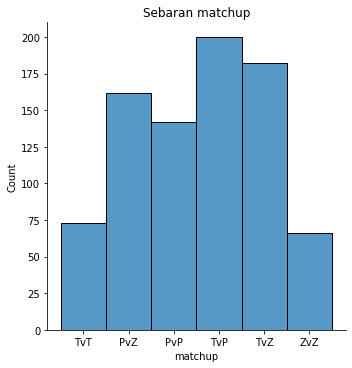

In [13]:
sns.displot(eda.matchup)
plt.title("Sebaran matchup")

In [14]:
tvp = eda[eda['matchup'] == 'TvP']
tvz = eda[eda['matchup'] == 'TvZ']
pvz = eda[eda['matchup'] == 'PvZ']
pvp = eda[eda['matchup'] == 'PvP']
zvz = eda[eda['matchup'] == 'ZvZ']
tvt = eda[eda['matchup'] == 'TvT']
tvp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 6 to 826
Data columns (total 49 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               200 non-null    object 
 1   played_at                        200 non-null    int64  
 2   tournament                       200 non-null    object 
 3   map                              200 non-null    object 
 4   game_length                      200 non-null    int64  
 5   winner                           200 non-null    int64  
 6   matchup                          200 non-null    object 
 7   p1_max_collection_rate           200 non-null    int64  
 8   p2_max_collection_rate           200 non-null    int64  
 9   p1_apm                           200 non-null    int64  
 10  p2_apm                           200 non-null    int64  
 11  p1_spm                           200 non-null    float64
 12  p2_spm                

In [15]:
def swap_columns(df, c1, c2):
    df['temp'] = df[c1]
    df[c1] = df[c2]
    df[c2] = df['temp']
    df.drop(columns=['temp'], inplace=True)

In [16]:
col1 = [c for c in eda.columns if c.lower()[:2] != 'p2']
col2 = [c for c in eda.columns if c.lower()[:2] != 'p1']
tmp1 = tvp[tvp['p1_race'] == 'Protoss']
tmp11 = tvp[tvp['p1_race'] == 'Terran']

print(tmp1.info())
for i in range(len(col1)):
    swap_columns(tmp1, col1[i], col2[i])
tmp1['winner'].replace([1,2],[2,1],inplace=True)
print(tmp1.info())


tmp2 = tvz[tvz['p1_race'] == 'Zerg']
tmp22 = tvz[tvz['p1_race'] == 'Terran']
print(tmp2.info())
for i in range(len(col1)):
    swap_columns(tmp2, col1[i], col2[i])
tmp2['winner'].replace([1,2],[2,1],inplace=True)
print(tmp2.info())

tmp3 = pvz[pvz['p1_race'] == 'Zerg']
tmp33 = pvz[pvz['p1_race'] == 'Protoss']
print(tmp3.info())
for i in range(len(col1)):
    swap_columns(tmp3, col1[i], col2[i])
tmp3['winner'].replace([1,2],[2,1],inplace=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 94 entries, 6 to 813
Data columns (total 49 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               94 non-null     object 
 1   played_at                        94 non-null     int64  
 2   tournament                       94 non-null     object 
 3   map                              94 non-null     object 
 4   game_length                      94 non-null     int64  
 5   winner                           94 non-null     int64  
 6   matchup                          94 non-null     object 
 7   p1_max_collection_rate           94 non-null     int64  
 8   p2_max_collection_rate           94 non-null     int64  
 9   p1_apm                           94 non-null     int64  
 10  p2_apm                           94 non-null     int64  
 11  p1_spm                           94 non-null     float64
 12  p2_spm                 

<ipython-input-15-9d0ee3f70e2c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['temp'] = df[c1]
<ipython-input-15-9d0ee3f70e2c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[c1] = df[c2]
<ipython-input-15-9d0ee3f70e2c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

In [17]:
frames = [tmp1, tmp2, tmp3, tmp11, tmp22, tmp33, pvp, tvt, zvz]
result = pd.concat(frames)

In [18]:
result.groupby('p1_race').median().transpose()

p1_race,Protoss,Terran,Zerg
played_at,0.000,1.00,3.00
game_length,628.000,725.00,481.00
winner,2.000,1.00,1.00
p1_max_collection_rate,3364.000,3750.00,2639.00
p2_max_collection_rate,3537.500,3762.00,2723.00
p1_apm,306.000,351.00,409.50
p2_apm,373.000,351.00,410.00
p1_spm,34.500,31.10,46.50
p2_spm,35.250,37.10,48.50
p1_workers_produced,70.000,74.00,57.50


In [19]:
eda.groupby('p2_race').median().transpose()

p2_race,Protoss,Terran,Zerg
played_at,1.000,1.00,1.000
game_length,615.500,709.00,682.000
winner,1.000,1.00,2.000
p1_max_collection_rate,3322.000,3728.00,3725.500
p2_max_collection_rate,3353.000,3790.00,3873.500
p1_apm,338.000,361.00,356.000
p2_apm,307.000,347.00,435.000
p1_spm,34.400,36.60,35.850
p2_spm,33.900,30.60,43.250
p1_workers_produced,69.000,85.00,77.000


# APM per matchup

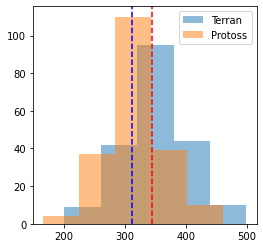

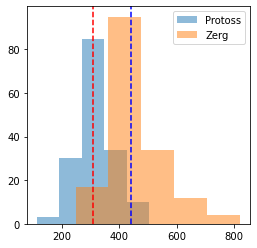

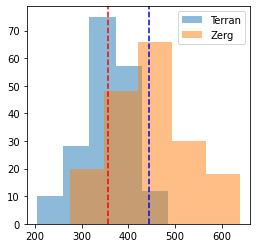

In [20]:
plt.figure(figsize=(4,4))
plt.hist(result.p1_apm[result.matchup == 'TvP'],bins=5,alpha=0.5,label="Terran")
plt.hist(result.p2_apm[result.matchup == 'TvP'],bins=5,alpha=0.5,label="Protoss")
plt.axvline(result.p1_apm[result.matchup == 'TvP'].median(), color='r', linestyle='--')
plt.axvline(result.p2_apm[result.matchup == 'TvP'].median(), color='b', linestyle='--')
plt.legend();
plt.show()


plt.figure(figsize=(4,4))
plt.hist(result.p1_apm[result.matchup == 'PvZ'],bins=5,alpha=0.5,label="Protoss")
plt.hist(result.p2_apm[result.matchup == 'PvZ'],bins=5,alpha=0.5,label="Zerg")
plt.axvline(result.p1_apm[result.matchup == 'PvZ'].median(), color='r', linestyle='--')
plt.axvline(result.p2_apm[result.matchup == 'PvZ'].median(), color='b', linestyle='--')
plt.legend();
plt.show()

plt.figure(figsize=(4,4))
plt.hist(result.p1_apm[result.matchup == 'TvZ'],bins=5,alpha=0.5,label="Terran")
plt.hist(result.p2_apm[result.matchup == 'TvZ'],bins=5,alpha=0.5,label="Zerg")
plt.axvline(result.p1_apm[result.matchup == 'TvZ'].median(), color='r', linestyle='--')
plt.axvline(result.p2_apm[result.matchup == 'TvZ'].median(), color='b', linestyle='--')
plt.legend();
plt.show()

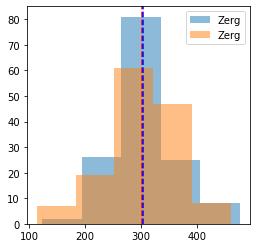

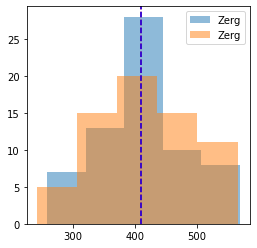

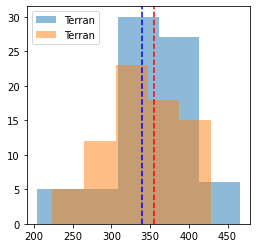

In [21]:
plt.figure(figsize=(4,4))
plt.hist(result.p1_apm[result.matchup == 'PvP'],bins=5,alpha=0.5,label="Zerg")
plt.hist(result.p2_apm[result.matchup == 'PvP'],bins=5,alpha=0.5,label="Zerg")
plt.axvline(result.p1_apm[result.matchup == 'PvP'].median(), color='r', linestyle='--')
plt.axvline(result.p2_apm[result.matchup == 'PvP'].median(), color='b', linestyle='--')
plt.legend();
plt.show()
plt.figure(figsize=(4,4))
plt.hist(result.p1_apm[result.matchup == 'ZvZ'],bins=5,alpha=0.5,label="Zerg")
plt.hist(result.p2_apm[result.matchup == 'ZvZ'],bins=5,alpha=0.5,label="Zerg")
plt.axvline(result.p1_apm[result.matchup == 'ZvZ'].median(), color='r', linestyle='--')
plt.axvline(result.p2_apm[result.matchup == 'ZvZ'].median(), color='b', linestyle='--')
plt.legend();
plt.show()
plt.figure(figsize=(4,4))
plt.hist(result.p1_apm[result.matchup == 'TvT'],bins=5,alpha=0.5,label="Terran")
plt.hist(result.p2_apm[result.matchup == 'TvT'],bins=5,alpha=0.5,label="Terran")
plt.axvline(result.p1_apm[result.matchup == 'TvT'].median(), color='r', linestyle='--')
plt.axvline(result.p2_apm[result.matchup == 'TvT'].median(), color='b', linestyle='--')
plt.legend();
plt.show()

# Does having higher APM translate to a win?

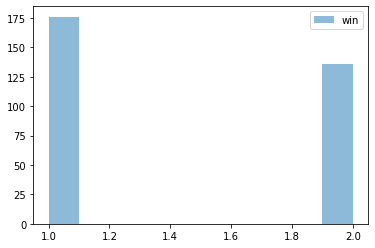

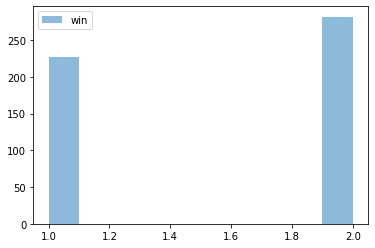

1.0 2.0


In [22]:
high_apm1 = result[(result['p1_apm']) > (result['p2_apm'])]
plt.hist(high_apm1.winner,alpha=0.5,label="win")
plt.legend();
plt.show()

high_apm2 = result[(result['p2_apm']) > (result['p1_apm'])]
plt.hist(high_apm2.winner,alpha=0.5,label="win")
plt.legend();
plt.show()
print(high_apm1.winner.median(),high_apm2.winner.median())


As we can see from the diagram above, having higher APM or playing more aggresive will give you higher chance of winning.

# Does using a certain race will give you a better chance of winning?

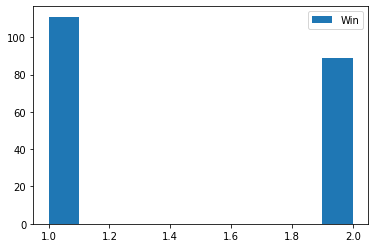

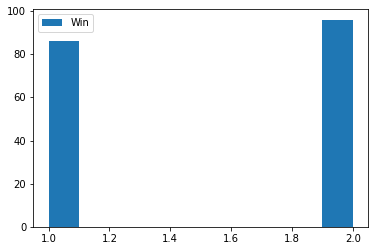

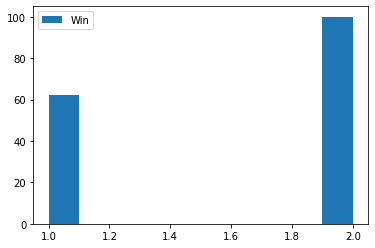

In [23]:
# plt.figure(figsize=(4,4))
# plt.bar(result.matchup, result.winner)
# plt.show()

plt.hist(result.winner[result.matchup == 'TvP'],label="Win")
plt.legend();
plt.show()


plt.hist(result.winner[result.matchup == 'TvZ'],label="Win")
plt.legend();
plt.show()

plt.hist(result.winner[result.matchup == 'PvZ'],label="Win")
plt.legend();
plt.show()




As we can see, using `Zerg` race will give you higher chance of winning

# Which map is used most frequent?

<AxesSubplot:>

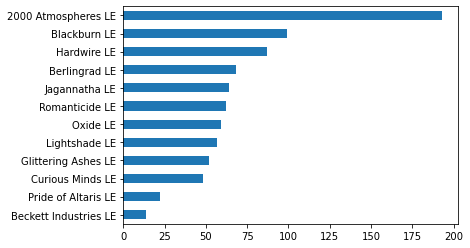

In [24]:
eda.map.value_counts().sort_values().plot(kind = 'barh')

From the bar above we can see that `2000 Atmospheres LE` is used the most, but is it the same for each `matchup`?

<AxesSubplot:>

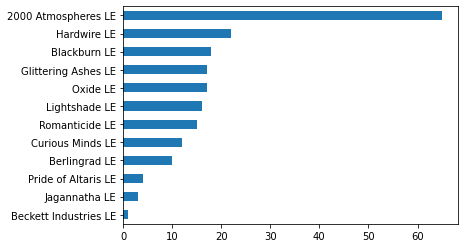

In [25]:
tvp.map.value_counts().sort_values().plot(kind = 'barh')

<AxesSubplot:>

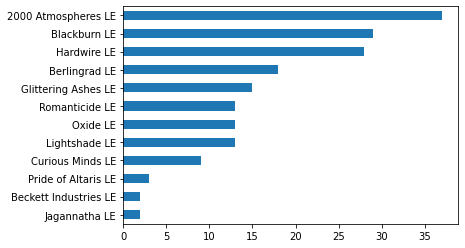

In [26]:
tvz.map.value_counts().sort_values().plot(kind = 'barh')

<AxesSubplot:>

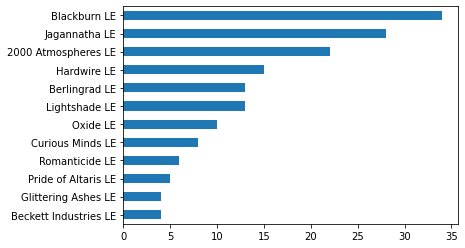

In [27]:
pvz.map.value_counts().sort_values().plot(kind = 'barh')

<AxesSubplot:>

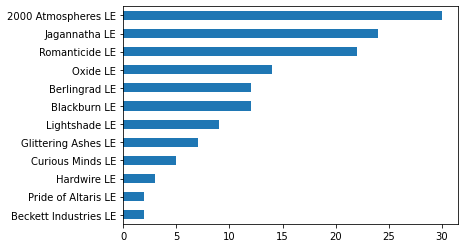

In [28]:
pvp.map.value_counts().sort_values().plot(kind = 'barh')

<AxesSubplot:>

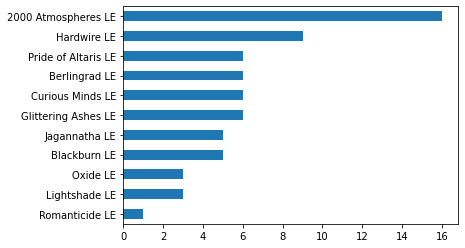

In [29]:
zvz.map.value_counts().sort_values().plot(kind = 'barh')

<AxesSubplot:>

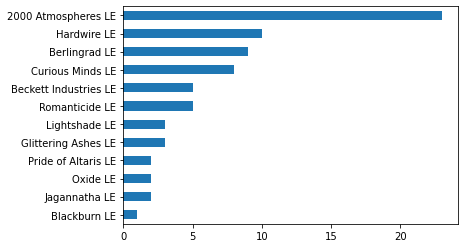

In [30]:
tvt.map.value_counts().sort_values().plot(kind = 'barh')

Only `PvZ` uses `Blackburn LE` more frequent than `2000 Atmospheres LE`

# At what time does a match happen?

Text(0.5, 1.0, 'Sebaran waktu penyelenggaraan match')

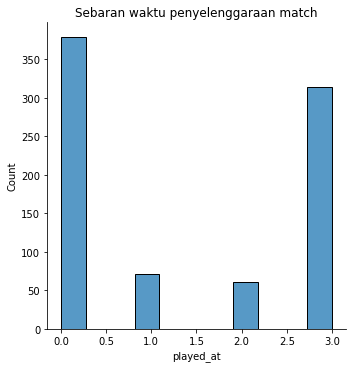

In [31]:
sns.displot(eda.played_at)
plt.title("Sebaran waktu penyelenggaraan match")

As we can see, the matchup usually happen in the morning or at night

===============================================================================

In [32]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [33]:
df_train

,id,played_at,tournament,map,game_length,winner,matchup,p1_max_collection_rate,p2_max_collection_rate,p1_apm,...,p1_avg_collection_rate_gas,p1_avg_unspent_gas,p1_gas_lost,p1_gas_collected,p2_avg_collection_rate_gas,p2_avg_unspent_gas,p2_gas_lost,p2_gas_collected,p1_race,p2_race
0,0205bd314da54b6fb363a998ca0c49ba,2022-02-25 03:01:50+00:00,IEM Katowice,2000 애트모스피어 - 래더,848,2,TvT,3778,3952,316,...,533.8,273.8,3436,6384,636.3,253.2,2864,7412,Terran,Terran
1,7ca6c874c8064364b4247780495fe4f2,2021-10-17 05:11:18+00:00,DH Masters Winter,Beckett Industries LE,612,1,PvZ,4344,3140,398,...,473.9,236.7,625,4265,427.4,201.3,850,3665,Zerg,Protoss
2,92ccfb1330424a4fb572585b8d6ea4c9,2021-10-10 01:50:23+00:00,DH Masters Winter,Beckett Industries LE,486,2,PvZ,3095,2944,389,...,226.5,157.6,800,1668,336.1,170.0,75,2436,Zerg,Protoss
3,d592c15de2a94b6aa5278b0fc241de54,2022-02-25 04:27:49+00:00,IEM Katowice,[ESL] Berlingrad,1078,2,PvZ,4064,4193,449,...,749.7,401.2,5850,11682,892.6,664.5,3850,13344,Protoss,Zerg
4,6a24b0487aef460a982d2ec930947c11,2021-12-15 19:17:24+00:00,DH Masters Last Chance,블랙번 - 래더,1001,1,PvZ,4484,4243,627,...,826.1,299.8,8975,11930,675.6,174.5,8200,10256,Zerg,Protoss
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,bb13189cdb4c4d34bebc09f2546df46e,2022-01-13 22:58:13+00:00,DH Masters Last Chance,[TLMC15] Pride of Altaris,1059,1,ZvZ,3863,3471,471,...,561.1,243.5,4025,7971,446.9,147.0,4018,6423,Zerg,Zerg
825,3ee7eb14c106467683af88ae1bfda71b,2021-10-02 01:01:18+00:00,DH Masters Winter,Jagannatha LE,473,1,PvP,2754,2625,225,...,298.7,121.2,700,1939,332.4,129.8,600,2432,Protoss,Protoss
826,0065adb438824feb9e1ae15d41454797,2021-09-30 01:21:21+00:00,DH Masters Winter,Oxide LE,650,2,TvP,2860,3510,456,...,413.2,173.2,1900,3867,457.3,195.0,1250,4383,Terran,Protoss
827,e221451188444336a154949b8fe4ac33,2022-02-26 00:08:08+00:00,IEM Katowice,[ESL] Blackburn,881,1,PvZ,4613,3862,558,...,793.9,306.3,4100,10243,580.9,295.9,2925,8144,Zerg,Protoss


In [34]:
df_train['played_at'] = df_train['played_at'].apply(lambda x: int(x.split()[1][:2]))
df_test['played_at'] = df_test['played_at'].apply(lambda x: int(x.split()[1][:2]))

In [35]:
df_train['map'].replace(['블랙번 - 래더','[ESL] Blackburn','[TLMC14] Blackburn','黑色燃烧-天梯版','Blackburn EE'], 'Blackburn LE',inplace=True)
df_train['map'].replace(['2000 애트모스피어 - 래더','Atmosphère 2\xa0000 EC','2000 атмосфер РВ','大气2000-天梯版'], '2000 Atmospheres LE',inplace=True)
df_train['map'].replace(['하드와이어 - 래더','[ESL] Hardwire','하드와이어 - 래더','硬线-天梯版','[TLMC15] Hardwire'], 'Hardwire LE',inplace=True)
df_train['map'].replace(['[ESL] Berlingrad','베를린그라드 - 래더','Berlingrad EC','[TLMC15] Berlingrad','Берлинград РВ','柏林加德-天梯版'], 'Berlingrad LE',inplace=True)
df_train['map'].replace(['光影交错-天梯版'], 'Lightshade LE',inplace=True)
df_train['map'].replace(['紫晶浪漫-天梯版'], 'Romanticide LE',inplace=True)
df_train['map'].replace(['[ESL] Glittering Ashes','글리터링 애쉬즈 - 래더','[TLMC15] Glittering Ashes'], 'Glittering Ashes LE',inplace=True)
df_train['map'].replace(['Mentes curiosas EE','큐리어스 마인즈 - 래더','[ESL] Curious Minds','[TLMC15] Curious Minds'], 'Curious Minds LE',inplace=True)
df_train['map'].replace(['프라이드 오브 알타리스 - 래더','[TLMC15] Pride of Altaris','[ESL] Pride of Altaris'], 'Pride of Altaris LE',inplace=True)

In [36]:
df_train['map'].unique()

array(['2000 Atmospheres LE', 'Beckett Industries LE', 'Berlingrad LE',
       'Blackburn LE', 'Lightshade LE', 'Oxide LE', 'Hardwire LE',
       'Jagannatha LE', 'Glittering Ashes LE', 'Curious Minds LE',
       'Pride of Altaris LE', 'Romanticide LE', '锈化山巅-天梯版', '世界主宰-天梯版',
       '新奇之地-天梯版'], dtype=object)

In [37]:
df_test['map'].replace(['블랙번 - 래더','[ESL] Blackburn','[TLMC14] Blackburn','黑色燃烧-天梯版','Blackburn EE'], 'Blackburn LE',inplace=True)
df_test['map'].replace(['2000 애트모스피어 - 래더','Atmosphère 2\xa0000 EC','2000 атмосфер РВ','大气2000-天梯版'], '2000 Atmospheres LE',inplace=True)
df_test['map'].replace(['하드와이어 - 래더','[ESL] Hardwire','하드와이어 - 래더','硬线-天梯版','[TLMC15] Hardwire'], 'Hardwire LE',inplace=True)
df_test['map'].replace(['[ESL] Berlingrad','베를린그라드 - 래더','Berlingrad EC','[TLMC15] Berlingrad','Берлинград РВ','柏林加德-天梯版'], 'Berlingrad LE',inplace=True)
df_test['map'].replace(['光影交错-天梯版'], 'Lightshade LE',inplace=True)
df_test['map'].replace(['紫晶浪漫-天梯版'], 'Romanticide LE',inplace=True)
df_test['map'].replace(['[ESL] Glittering Ashes','글리터링 애쉬즈 - 래더','[TLMC15] Glittering Ashes'], 'Glittering Ashes LE',inplace=True)
df_test['map'].replace(['Mentes curiosas EE','큐리어스 마인즈 - 래더','[ESL] Curious Minds','[TLMC15] Curious Minds'], 'Curious Minds LE',inplace=True)
df_test['map'].replace(['프라이드 오브 알타리스 - 래더','[TLMC15] Pride of Altaris','[ESL] Pride of Altaris'], 'Pride of Altaris LE',inplace=True)
df_test['map'].replace(['贝克特工业-天梯版'], 'Beckett Industries LE',inplace=True)

In [38]:
df_test['map'].unique()

array(['2000 Atmospheres LE', 'Lightshade LE', 'Blackburn LE',
       'Beckett Industries LE', 'Jagannatha LE', 'Glittering Ashes LE',
       'Berlingrad LE', 'Hardwire LE', 'Oxide LE', 'Curious Minds LE',
       'Romanticide LE', 'Pride of Altaris LE', '闪烬平原-天梯版', '锈化山巅-天梯版',
       '世界主宰-天梯版'], dtype=object)

In [39]:
x = pd.concat([df_train['map'],df_test['map']])

In [40]:
cols = [c for c in df_train.columns if c.lower()[:2] != 'p2']
colst = [c for c in df_test.columns if c.lower()[:2] != 'p2']
p1_ = df_train[cols]
p1_t = df_test[colst]

cols = [c for c in df_train.columns if c.lower()[:2] != 'p1']
colst = [c for c in df_test.columns if c.lower()[:2] != 'p1']

p2_ = df_train[cols]
p2_t = df_test[colst]

set_map = set()
for i in x:
    set_map.add(i)
lst_maps = list(set_map)

set_tour = set()
for i in p1_['tournament']:
    set_tour.add(i)
lst_tour = list(set_tour)

set_race = set()
for i in df_train['p1_race']:
    set_race.add(i)
lst_race = list(set_race)



maps = {element: lst_maps.index(element) for element in lst_maps}
tour = {element: lst_tour.index(element) for element in lst_tour}
race = {element: lst_race.index(element) for element in lst_race}

p1_.replace(maps,inplace=True)
p1_.replace(tour,inplace=True)

p1_t.replace(maps,inplace=True)
p1_t.replace(tour,inplace=True)

p2_.replace(maps,inplace=True)
p2_.replace(tour,inplace=True)

p2_t.replace(maps,inplace=True)
p2_t.replace(tour,inplace=True)


p1_ = p1_.drop(['id','matchup',],axis=1)
p1_t = p1_t.drop(['id'],axis=1)

p2_ = p2_.drop(['id','matchup',],axis=1)
p2_t = p2_t.drop(['id'],axis=1)

df_train.drop(['id'],axis=1,inplace=True)


testt = df_test['id']

df_test.drop(['id'],axis=1,inplace=True)

df_train.replace(maps,inplace=True)
df_train.replace(race,inplace=True)
df_train.replace(tour,inplace=True)

df_test.replace(maps,inplace=True)

df_test.replace(tour,inplace=True)

/Users/aryafchandra/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [41]:
y = df_train['matchup']

In [42]:
#Classify Race
X = p1_.drop('p1_race', axis=1)
Y = p1_['p1_race']


X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=.2,random_state=50)
X_train

Z = p2_.drop('p2_race', axis=1)
A = p2_['p2_race']


z_train, z_test, a_train, a_test = train_test_split(Z,A,test_size=.2,random_state=50)
z_train

,played_at,tournament,map,game_length,winner,p2_max_collection_rate,p2_apm,p2_spm,p2_workers_produced,p2_workers_killed,...,p2_avg_pac_actions,p2_avg_pac_gap,p2_avg_collection_rate_minerals,p2_avg_unspent_minerals,p2_minerals_lost,p2_minerals_collected,p2_avg_collection_rate_gas,p2_avg_unspent_gas,p2_gas_lost,p2_gas_collected
573,23,2,7,214,2,867,424,14.8,15,20,...,26.17,0.17,372.8,121.5,375,2410,0.0,0.0,0,0
681,22,0,3,859,1,4086,341,17.3,66,53,...,7.08,0.06,2122.4,242.5,17225,29725,475.1,270.9,3150,5441
558,0,2,4,883,1,5290,356,24.4,85,37,...,7.85,0.06,2175.4,274.2,12500,30470,739.4,241.6,5325,8976
331,5,2,11,716,1,3986,394,15.2,98,6,...,11.72,0.05,1731.1,266.4,6875,21295,436.9,210.7,2200,4732
538,1,2,2,438,1,1314,421,12.4,24,2,...,13.44,0.02,789.9,140.7,1050,6635,241.1,154.7,550,1576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,2,1,12,553,2,2888,415,39.9,73,51,...,10.65,0.06,1267.7,198.7,1681,12507,357.8,160.2,531,3079
289,20,2,11,693,1,3655,284,47.2,78,4,...,6.26,0.10,1665.7,294.1,7225,19730,442.4,185.1,3275,4556
109,19,0,15,569,1,2429,323,35.5,55,1,...,6.09,0.06,1245.5,200.9,2950,12050,315.6,206.6,650,2430
480,11,1,3,860,2,4686,534,31.9,112,49,...,11.07,0.09,2148.3,293.7,15900,30685,632.3,371.6,5375,8286


In [43]:
model1 = CatBoostClassifier()
model1.fit(X_train, y_train)

y_pred = model1.predict(X_train)
Y_pred = model1.predict(X_test)

acc = model1.score(X_train, y_train)
Acc = model1.score(X_test, y_test)

test_1 = model1.predict(p1_t)


print("Data train accuracy:", acc)
print("Data test accuracy:", Acc)

Learning rate set to 0.077485
0:	learn: 1.0713837	total: 64.9ms	remaining: 1m 4s
1:	learn: 1.0384129	total: 68.7ms	remaining: 34.3s
2:	learn: 1.0133847	total: 72.2ms	remaining: 24s
3:	learn: 0.9809312	total: 76ms	remaining: 18.9s
4:	learn: 0.9594103	total: 79.4ms	remaining: 15.8s
5:	learn: 0.9385259	total: 82.7ms	remaining: 13.7s
6:	learn: 0.9171239	total: 85.9ms	remaining: 12.2s
7:	learn: 0.8932157	total: 89.3ms	remaining: 11.1s
8:	learn: 0.8733889	total: 92.6ms	remaining: 10.2s
9:	learn: 0.8556515	total: 96ms	remaining: 9.51s
10:	learn: 0.8360928	total: 99.1ms	remaining: 8.91s
11:	learn: 0.8205442	total: 103ms	remaining: 8.46s
12:	learn: 0.8066144	total: 106ms	remaining: 8.05s
13:	learn: 0.7925924	total: 109ms	remaining: 7.68s
14:	learn: 0.7764618	total: 112ms	remaining: 7.38s
15:	learn: 0.7630035	total: 116ms	remaining: 7.11s
16:	learn: 0.7503927	total: 119ms	remaining: 6.88s
17:	learn: 0.7370319	total: 123ms	remaining: 6.69s
18:	learn: 0.7264423	total: 126ms	remaining: 6.51s
19:	le

193:	learn: 0.2045721	total: 751ms	remaining: 3.12s
194:	learn: 0.2035144	total: 755ms	remaining: 3.12s
195:	learn: 0.2023909	total: 758ms	remaining: 3.11s
196:	learn: 0.2013371	total: 762ms	remaining: 3.1s
197:	learn: 0.2003843	total: 765ms	remaining: 3.1s
198:	learn: 0.1992307	total: 769ms	remaining: 3.09s
199:	learn: 0.1982742	total: 773ms	remaining: 3.09s
200:	learn: 0.1972059	total: 776ms	remaining: 3.08s
201:	learn: 0.1961935	total: 779ms	remaining: 3.08s
202:	learn: 0.1952277	total: 784ms	remaining: 3.08s
203:	learn: 0.1947326	total: 788ms	remaining: 3.08s
204:	learn: 0.1938306	total: 792ms	remaining: 3.07s
205:	learn: 0.1930556	total: 796ms	remaining: 3.07s
206:	learn: 0.1923853	total: 800ms	remaining: 3.06s
207:	learn: 0.1917018	total: 803ms	remaining: 3.06s
208:	learn: 0.1904445	total: 807ms	remaining: 3.05s
209:	learn: 0.1892292	total: 810ms	remaining: 3.05s
210:	learn: 0.1887829	total: 814ms	remaining: 3.04s
211:	learn: 0.1879411	total: 817ms	remaining: 3.04s
212:	learn: 0.

359:	learn: 0.1054155	total: 1.31s	remaining: 2.34s
360:	learn: 0.1052919	total: 1.32s	remaining: 2.33s
361:	learn: 0.1049368	total: 1.32s	remaining: 2.33s
362:	learn: 0.1046991	total: 1.33s	remaining: 2.33s
363:	learn: 0.1044234	total: 1.33s	remaining: 2.33s
364:	learn: 0.1039731	total: 1.33s	remaining: 2.32s
365:	learn: 0.1035706	total: 1.34s	remaining: 2.32s
366:	learn: 0.1033386	total: 1.34s	remaining: 2.31s
367:	learn: 0.1027219	total: 1.34s	remaining: 2.31s
368:	learn: 0.1023192	total: 1.35s	remaining: 2.3s
369:	learn: 0.1020243	total: 1.35s	remaining: 2.3s
370:	learn: 0.1017213	total: 1.35s	remaining: 2.3s
371:	learn: 0.1016014	total: 1.36s	remaining: 2.29s
372:	learn: 0.1013268	total: 1.36s	remaining: 2.29s
373:	learn: 0.1008372	total: 1.36s	remaining: 2.29s
374:	learn: 0.1004210	total: 1.37s	remaining: 2.28s
375:	learn: 0.0998370	total: 1.37s	remaining: 2.28s
376:	learn: 0.0995890	total: 1.37s	remaining: 2.27s
377:	learn: 0.0992500	total: 1.38s	remaining: 2.27s
378:	learn: 0.0

521:	learn: 0.0642519	total: 1.88s	remaining: 1.72s
522:	learn: 0.0640996	total: 1.88s	remaining: 1.72s
523:	learn: 0.0639151	total: 1.89s	remaining: 1.71s
524:	learn: 0.0637174	total: 1.89s	remaining: 1.71s
525:	learn: 0.0635292	total: 1.89s	remaining: 1.71s
526:	learn: 0.0633351	total: 1.9s	remaining: 1.7s
527:	learn: 0.0631393	total: 1.9s	remaining: 1.7s
528:	learn: 0.0629573	total: 1.91s	remaining: 1.7s
529:	learn: 0.0628093	total: 1.91s	remaining: 1.69s
530:	learn: 0.0626244	total: 1.91s	remaining: 1.69s
531:	learn: 0.0625008	total: 1.92s	remaining: 1.68s
532:	learn: 0.0623864	total: 1.92s	remaining: 1.68s
533:	learn: 0.0622802	total: 1.92s	remaining: 1.68s
534:	learn: 0.0621447	total: 1.93s	remaining: 1.67s
535:	learn: 0.0619870	total: 1.93s	remaining: 1.67s
536:	learn: 0.0618155	total: 1.93s	remaining: 1.67s
537:	learn: 0.0616880	total: 1.94s	remaining: 1.66s
538:	learn: 0.0615856	total: 1.94s	remaining: 1.66s
539:	learn: 0.0614021	total: 1.94s	remaining: 1.65s
540:	learn: 0.061

725:	learn: 0.0414007	total: 2.61s	remaining: 985ms
726:	learn: 0.0413129	total: 2.61s	remaining: 982ms
727:	learn: 0.0412410	total: 2.62s	remaining: 978ms
728:	learn: 0.0411640	total: 2.62s	remaining: 975ms
729:	learn: 0.0410988	total: 2.63s	remaining: 971ms
730:	learn: 0.0409855	total: 2.63s	remaining: 967ms
731:	learn: 0.0409117	total: 2.63s	remaining: 964ms
732:	learn: 0.0408206	total: 2.64s	remaining: 960ms
733:	learn: 0.0407502	total: 2.64s	remaining: 957ms
734:	learn: 0.0406965	total: 2.64s	remaining: 953ms
735:	learn: 0.0406066	total: 2.65s	remaining: 950ms
736:	learn: 0.0405515	total: 2.65s	remaining: 946ms
737:	learn: 0.0404646	total: 2.65s	remaining: 942ms
738:	learn: 0.0403989	total: 2.66s	remaining: 938ms
739:	learn: 0.0403109	total: 2.66s	remaining: 935ms
740:	learn: 0.0402417	total: 2.66s	remaining: 931ms
741:	learn: 0.0401777	total: 2.67s	remaining: 927ms
742:	learn: 0.0401101	total: 2.67s	remaining: 924ms
743:	learn: 0.0400231	total: 2.67s	remaining: 920ms
744:	learn: 

926:	learn: 0.0292147	total: 3.36s	remaining: 264ms
927:	learn: 0.0291637	total: 3.36s	remaining: 261ms
928:	learn: 0.0291413	total: 3.37s	remaining: 257ms
929:	learn: 0.0290809	total: 3.37s	remaining: 254ms
930:	learn: 0.0290065	total: 3.37s	remaining: 250ms
931:	learn: 0.0289835	total: 3.38s	remaining: 246ms
932:	learn: 0.0289598	total: 3.38s	remaining: 243ms
933:	learn: 0.0289311	total: 3.38s	remaining: 239ms
934:	learn: 0.0288941	total: 3.39s	remaining: 235ms
935:	learn: 0.0288505	total: 3.39s	remaining: 232ms
936:	learn: 0.0287965	total: 3.39s	remaining: 228ms
937:	learn: 0.0287480	total: 3.4s	remaining: 225ms
938:	learn: 0.0287109	total: 3.4s	remaining: 221ms
939:	learn: 0.0286587	total: 3.4s	remaining: 217ms
940:	learn: 0.0286027	total: 3.41s	remaining: 214ms
941:	learn: 0.0285748	total: 3.41s	remaining: 210ms
942:	learn: 0.0285360	total: 3.41s	remaining: 206ms
943:	learn: 0.0285024	total: 3.42s	remaining: 203ms
944:	learn: 0.0284708	total: 3.42s	remaining: 199ms
945:	learn: 0.0

In [55]:
model2 = CatBoostClassifier()
model2.fit(z_train, a_train)

y_pred = model2.predict(z_train)
Y_pred = model2.predict(z_test)

acc = model2.score(z_train, a_train)
Acc = f1_score(np.array(z_test), Y_pred.flatten())

test_2 = model2.predict(p2_t)


print("Data train accuracy:", acc)
print("Data test accuracy:", Acc)

Learning rate set to 0.077485
0:	learn: 1.0666119	total: 4ms	remaining: 4s
1:	learn: 1.0373161	total: 7.77ms	remaining: 3.88s
2:	learn: 1.0106334	total: 12.2ms	remaining: 4.04s
3:	learn: 0.9854372	total: 16.4ms	remaining: 4.09s
4:	learn: 0.9624884	total: 20.9ms	remaining: 4.15s
5:	learn: 0.9407167	total: 24.8ms	remaining: 4.11s
6:	learn: 0.9209865	total: 30.8ms	remaining: 4.37s
7:	learn: 0.8996942	total: 35.4ms	remaining: 4.39s
8:	learn: 0.8862049	total: 40.4ms	remaining: 4.45s
9:	learn: 0.8702742	total: 44.2ms	remaining: 4.38s
10:	learn: 0.8573111	total: 48.9ms	remaining: 4.39s
11:	learn: 0.8428170	total: 52.7ms	remaining: 4.34s
12:	learn: 0.8272484	total: 56.4ms	remaining: 4.28s
13:	learn: 0.8167970	total: 60.1ms	remaining: 4.23s
14:	learn: 0.8063856	total: 63.7ms	remaining: 4.18s
15:	learn: 0.7940260	total: 67.9ms	remaining: 4.18s
16:	learn: 0.7823967	total: 71.6ms	remaining: 4.14s
17:	learn: 0.7704580	total: 74.8ms	remaining: 4.08s
18:	learn: 0.7603510	total: 79.2ms	remaining: 4.09

210:	learn: 0.1922986	total: 738ms	remaining: 2.76s
211:	learn: 0.1910254	total: 742ms	remaining: 2.76s
212:	learn: 0.1899777	total: 746ms	remaining: 2.75s
213:	learn: 0.1892108	total: 749ms	remaining: 2.75s
214:	learn: 0.1886912	total: 753ms	remaining: 2.75s
215:	learn: 0.1881319	total: 757ms	remaining: 2.75s
216:	learn: 0.1871198	total: 760ms	remaining: 2.74s
217:	learn: 0.1863613	total: 764ms	remaining: 2.74s
218:	learn: 0.1854818	total: 767ms	remaining: 2.73s
219:	learn: 0.1845283	total: 771ms	remaining: 2.73s
220:	learn: 0.1837225	total: 774ms	remaining: 2.73s
221:	learn: 0.1826433	total: 777ms	remaining: 2.72s
222:	learn: 0.1818613	total: 781ms	remaining: 2.72s
223:	learn: 0.1809208	total: 784ms	remaining: 2.71s
224:	learn: 0.1800995	total: 787ms	remaining: 2.71s
225:	learn: 0.1795159	total: 791ms	remaining: 2.71s
226:	learn: 0.1787276	total: 795ms	remaining: 2.71s
227:	learn: 0.1784255	total: 798ms	remaining: 2.7s
228:	learn: 0.1775794	total: 801ms	remaining: 2.7s
229:	learn: 0.

369:	learn: 0.1055123	total: 1.3s	remaining: 2.22s
370:	learn: 0.1052196	total: 1.31s	remaining: 2.22s
371:	learn: 0.1048434	total: 1.31s	remaining: 2.22s
372:	learn: 0.1045797	total: 1.32s	remaining: 2.21s
373:	learn: 0.1042186	total: 1.32s	remaining: 2.21s
374:	learn: 0.1037817	total: 1.32s	remaining: 2.21s
375:	learn: 0.1035588	total: 1.33s	remaining: 2.2s
376:	learn: 0.1031708	total: 1.33s	remaining: 2.2s
377:	learn: 0.1027818	total: 1.34s	remaining: 2.2s
378:	learn: 0.1026407	total: 1.34s	remaining: 2.19s
379:	learn: 0.1022084	total: 1.34s	remaining: 2.19s
380:	learn: 0.1018396	total: 1.35s	remaining: 2.19s
381:	learn: 0.1016967	total: 1.35s	remaining: 2.18s
382:	learn: 0.1015654	total: 1.35s	remaining: 2.18s
383:	learn: 0.1013694	total: 1.36s	remaining: 2.17s
384:	learn: 0.1008623	total: 1.36s	remaining: 2.17s
385:	learn: 0.1006109	total: 1.36s	remaining: 2.17s
386:	learn: 0.1001974	total: 1.36s	remaining: 2.16s
387:	learn: 0.0999548	total: 1.37s	remaining: 2.16s
388:	learn: 0.09

532:	learn: 0.0663856	total: 1.87s	remaining: 1.64s
533:	learn: 0.0661914	total: 1.87s	remaining: 1.63s
534:	learn: 0.0660523	total: 1.87s	remaining: 1.63s
535:	learn: 0.0658955	total: 1.88s	remaining: 1.63s
536:	learn: 0.0656990	total: 1.88s	remaining: 1.62s
537:	learn: 0.0655229	total: 1.89s	remaining: 1.62s
538:	learn: 0.0653793	total: 1.89s	remaining: 1.61s
539:	learn: 0.0652625	total: 1.89s	remaining: 1.61s
540:	learn: 0.0651023	total: 1.9s	remaining: 1.61s
541:	learn: 0.0649222	total: 1.9s	remaining: 1.6s
542:	learn: 0.0646782	total: 1.9s	remaining: 1.6s
543:	learn: 0.0644554	total: 1.91s	remaining: 1.6s
544:	learn: 0.0643149	total: 1.91s	remaining: 1.59s
545:	learn: 0.0640815	total: 1.91s	remaining: 1.59s
546:	learn: 0.0639870	total: 1.92s	remaining: 1.59s
547:	learn: 0.0638302	total: 1.92s	remaining: 1.58s
548:	learn: 0.0636761	total: 1.92s	remaining: 1.58s
549:	learn: 0.0635034	total: 1.93s	remaining: 1.57s
550:	learn: 0.0632569	total: 1.93s	remaining: 1.57s
551:	learn: 0.0630

702:	learn: 0.0450108	total: 2.43s	remaining: 1.03s
703:	learn: 0.0448795	total: 2.43s	remaining: 1.02s
704:	learn: 0.0448316	total: 2.44s	remaining: 1.02s
705:	learn: 0.0447595	total: 2.44s	remaining: 1.02s
706:	learn: 0.0447051	total: 2.44s	remaining: 1.01s
707:	learn: 0.0445874	total: 2.45s	remaining: 1.01s
708:	learn: 0.0445061	total: 2.45s	remaining: 1s
709:	learn: 0.0443914	total: 2.45s	remaining: 1s
710:	learn: 0.0442625	total: 2.46s	remaining: 999ms
711:	learn: 0.0441612	total: 2.46s	remaining: 995ms
712:	learn: 0.0440528	total: 2.46s	remaining: 992ms
713:	learn: 0.0439861	total: 2.47s	remaining: 988ms
714:	learn: 0.0439336	total: 2.47s	remaining: 985ms
715:	learn: 0.0438437	total: 2.47s	remaining: 981ms
716:	learn: 0.0437786	total: 2.48s	remaining: 977ms
717:	learn: 0.0436941	total: 2.48s	remaining: 974ms
718:	learn: 0.0436485	total: 2.48s	remaining: 970ms
719:	learn: 0.0435803	total: 2.48s	remaining: 967ms
720:	learn: 0.0434836	total: 2.49s	remaining: 963ms
721:	learn: 0.0434

871:	learn: 0.0339890	total: 2.99s	remaining: 439ms
872:	learn: 0.0339501	total: 2.99s	remaining: 436ms
873:	learn: 0.0339049	total: 3s	remaining: 432ms
874:	learn: 0.0338699	total: 3s	remaining: 429ms
875:	learn: 0.0338034	total: 3.01s	remaining: 426ms
876:	learn: 0.0337525	total: 3.01s	remaining: 422ms
877:	learn: 0.0337062	total: 3.01s	remaining: 419ms
878:	learn: 0.0336496	total: 3.02s	remaining: 415ms
879:	learn: 0.0336250	total: 3.02s	remaining: 412ms
880:	learn: 0.0335828	total: 3.02s	remaining: 408ms
881:	learn: 0.0335648	total: 3.02s	remaining: 405ms
882:	learn: 0.0335122	total: 3.03s	remaining: 401ms
883:	learn: 0.0334774	total: 3.03s	remaining: 398ms
884:	learn: 0.0334409	total: 3.04s	remaining: 394ms
885:	learn: 0.0333829	total: 3.04s	remaining: 391ms
886:	learn: 0.0333348	total: 3.04s	remaining: 387ms
887:	learn: 0.0332933	total: 3.04s	remaining: 384ms
888:	learn: 0.0332660	total: 3.05s	remaining: 381ms
889:	learn: 0.0332141	total: 3.05s	remaining: 377ms
890:	learn: 0.0331

ValueError: Classification metrics can't handle a mix of continuous-multioutput and multiclass targets

In [49]:
Y_pred.flatten()

array(['Protoss', 'Protoss', 'Zerg', 'Protoss', 'Zerg', 'Zerg', 'Protoss',
       'Zerg', 'Terran', 'Protoss', 'Zerg', 'Protoss', 'Protoss',
       'Terran', 'Protoss', 'Zerg', 'Zerg', 'Terran', 'Protoss',
       'Protoss', 'Zerg', 'Terran', 'Protoss', 'Zerg', 'Protoss',
       'Protoss', 'Protoss', 'Protoss', 'Protoss', 'Protoss', 'Terran',
       'Zerg', 'Protoss', 'Terran', 'Terran', 'Terran', 'Zerg', 'Protoss',
       'Protoss', 'Protoss', 'Protoss', 'Zerg', 'Protoss', 'Protoss',
       'Zerg', 'Terran', 'Zerg', 'Terran', 'Terran', 'Zerg', 'Zerg',
       'Terran', 'Zerg', 'Zerg', 'Zerg', 'Terran', 'Protoss', 'Zerg',
       'Terran', 'Zerg', 'Zerg', 'Zerg', 'Zerg', 'Terran', 'Terran',
       'Zerg', 'Protoss', 'Terran', 'Zerg', 'Terran', 'Terran', 'Protoss',
       'Protoss', 'Protoss', 'Protoss', 'Protoss', 'Terran', 'Terran',
       'Protoss', 'Zerg', 'Protoss', 'Protoss', 'Zerg', 'Terran',
       'Protoss', 'Zerg', 'Zerg', 'Zerg', 'Zerg', 'Terran', 'Zerg',
       'Terran', 'Proto

In [ ]:
df_test['p1_race'] = test_1
df_test['p2_race'] = test_2
df_test.replace(race,inplace=True)

In [53]:
a_train

573       Zerg
681     Terran
558     Terran
331       Zerg
538    Protoss
        ...   
132     Terran
289    Protoss
109    Protoss
480       Zerg
688       Zerg
Name: p2_race, Length: 663, dtype: object

In [ ]:
#Classify matchup
X = df_train.drop('matchup', axis=1)
Y = df_train['matchup']


X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=.2,random_state=50)
X_train

In [ ]:
model3 = CatBoostClassifier()
model3.fit(X_train, y_train)

y_pred = model3.predict(X_train)
Y_pred = model3.predict(X_test)

acc = model3.score(X_train, y_train)
Acc = model3.score(X_test, y_test)

test_3 = model3.predict(df_test)

print("Data train accuracy:", acc)
print("Data test accuracy:", Acc)

In [ ]:
prediction = []
for i in test_pred:
    prediction.append(i[0])



submission = pd.DataFrame({'id':testt,'matchup':np.array(prediction)})

submission.to_csv('arya.csv',index=False)